In [1]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read file
data = pd.read_csv("C:/Users/dhine/Desktop/Analytics Certification Project/Assignment 1/games_dataset.csv")

In [3]:
data.head()

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Game Name     5000 non-null   object 
 1   Genre         5000 non-null   object 
 2   Platform      5000 non-null   object 
 3   Release Year  5000 non-null   int64  
 4   User Rating   5000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.4+ KB


In [5]:
#Tasks:
#1. Data Cleaning and Preprocessing:

#Checking null values
data.isnull().sum()

Game Name       0
Genre           0
Platform        0
Release Year    0
User Rating     0
dtype: int64

In [6]:
#Standardize the 'Genre' and 'Platform' columns for consistency.

data['Genre']=data['Genre'].str.strip().str.title()
data['Platform']=data['Platform'].str.strip().str.title()

In [7]:
# Create new features such as 'Decade' from the 'Release Year' column.

data['Decade']=(data['Release Year'] // 10) * 10

In [8]:
print(data['Genre'].unique())
print(data['Genre'].nunique())

['Sports' 'Puzzle' 'Strategy' 'Stealth' 'Simulation' 'Shooter' 'Adventure'
 'Horror' 'Racing' 'Role-Playing' 'Action' 'Survival' 'Fighting'
 'Platformer']
14


In [9]:
print(data['Platform'].unique())
print(data['Genre'].nunique())

['Nintendo Switch' 'Playstation' 'Pc' 'Xbox' 'Mobile']
14


In [10]:
#Analyze trends in game sales based on genre, platform, and release year.
plt.style.use("ggplot")

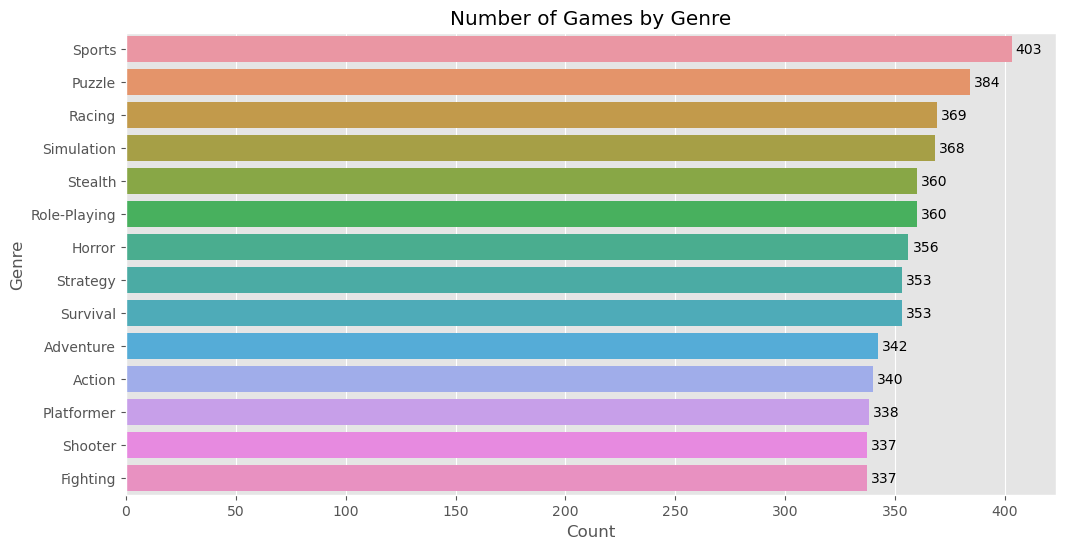

In [11]:
#EDA
# 1. Count of games by Genre
plt.figure(figsize=(12, 6))
ax=sns.countplot(y=data["Genre"], order=data["Genre"].value_counts().index)
plt.title("Number of Games by Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, padding=3)
plt.show()

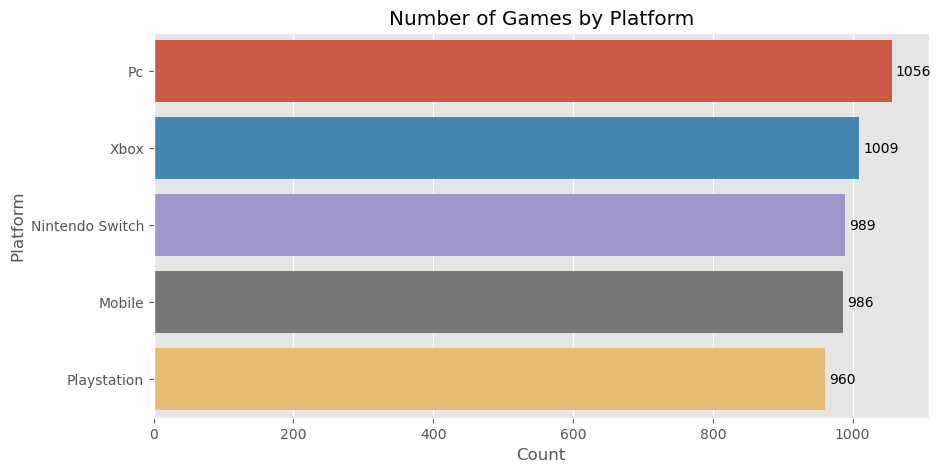

In [12]:
# 2. Count of games by Platform
plt.figure(figsize=(10, 5))
ax=sns.countplot(y=data["Platform"], order=data["Platform"].value_counts().index)
plt.title("Number of Games by Platform")
plt.xlabel("Count")
plt.ylabel("Platform")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, padding=3)
plt.show()

C:\Users\dhine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


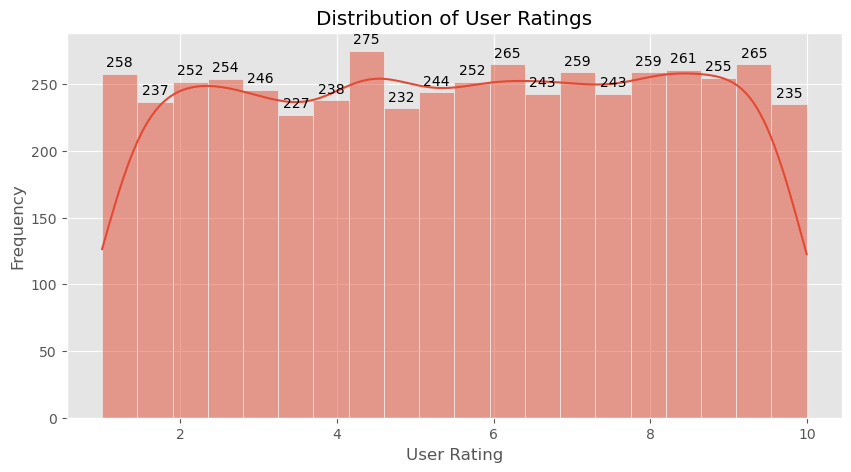

In [13]:
# 3. Visualize the distribution of user ratings across different genres and platforms
plt.figure(figsize=(10, 5))
ax=sns.histplot(data["User Rating"], bins=20, kde=True)
plt.title("Distribution of User Ratings")
plt.xlabel("User Rating")
plt.ylabel("Frequency")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", fontsize=10, padding=3)
plt.show()

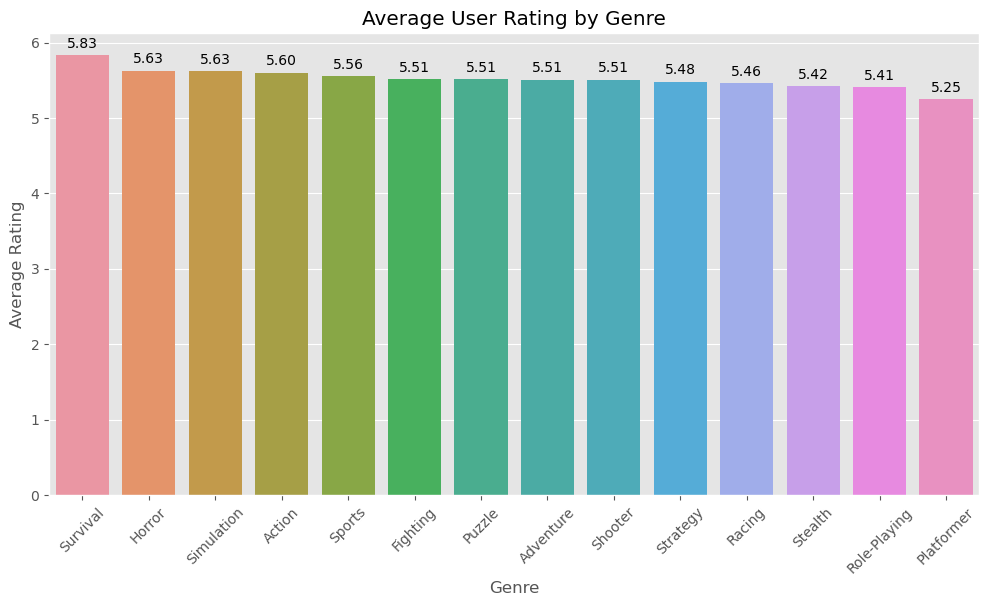

In [14]:
# 4. Identify the top 5 genres aby average user rating
avg_rating_genre = data.groupby("Genre")["User Rating"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ax=sns.barplot(x=avg_rating_genre.index, y=avg_rating_genre.values)
plt.xticks(rotation=45)
plt.title("Average User Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type="edge", fontsize=10, padding=3)
plt.show()

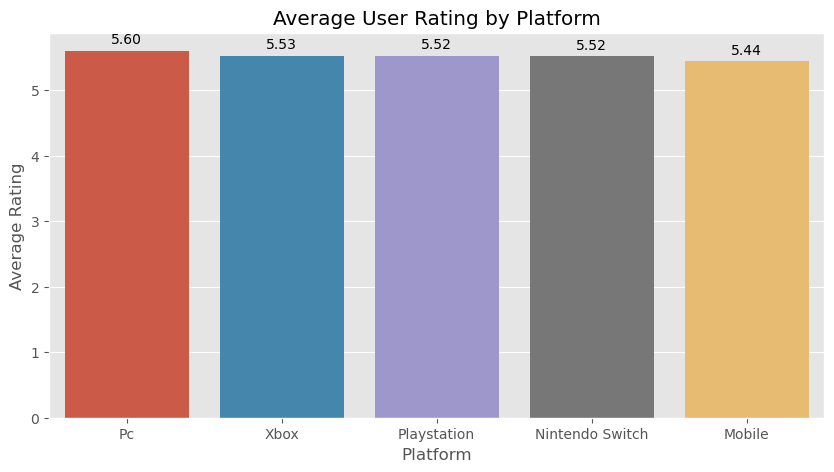

In [15]:
# 5. Identify the top 5 platforms by average user rating
avg_rating_platform = data.groupby("Platform")["User Rating"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
ax=sns.barplot(x=avg_rating_platform.index, y=avg_rating_platform.values)
plt.title("Average User Rating by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Rating")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type="edge", fontsize=10, padding=3)
plt.show()

C:\Users\dhine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


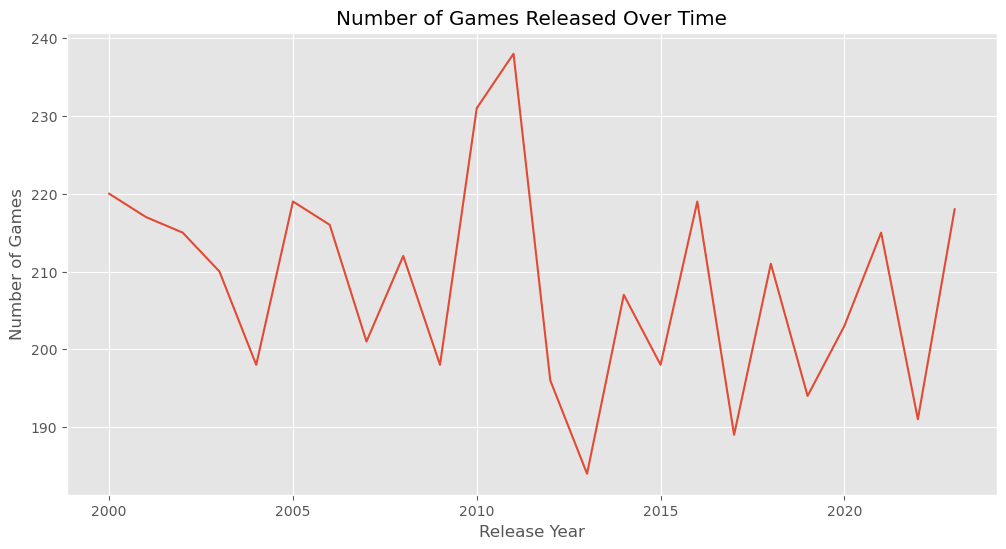

C:\Users\dhine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


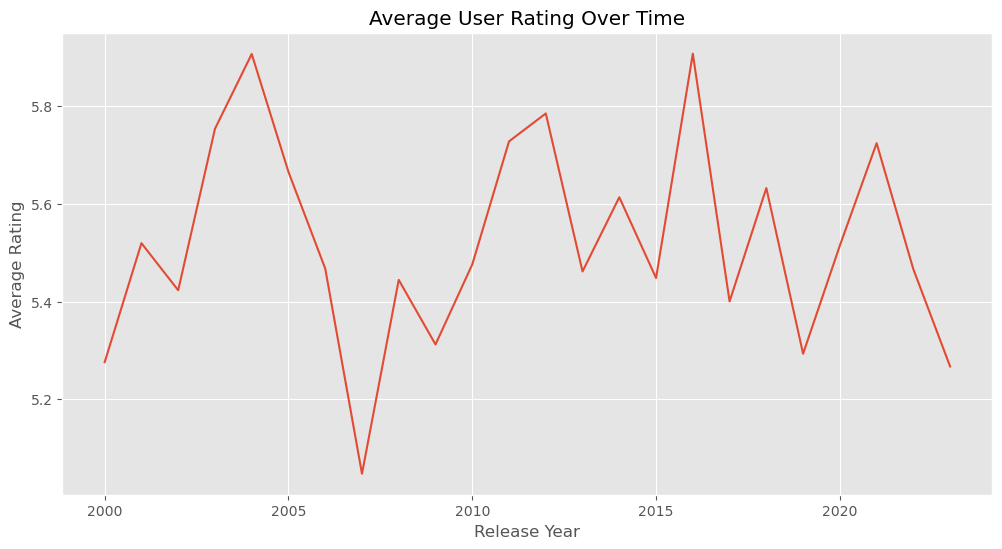

In [16]:
#Advanced Analysis
#Perform Timeseries Analysis to observe trends in game releases and user rating over decade 

# Number of games released per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=data["Release Year"].value_counts().index, y=data["Release Year"].value_counts().values)
plt.title("Number of Games Released Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Games")
plt.show()

# Average user rating over time
avg_rating_year = data.groupby("Release Year")["User Rating"].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rating_year.index, y=avg_rating_year.values)
plt.title("Average User Rating Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.show()


In [17]:
#Hypothesis Testing (User Ratings by Platform)
from scipy.stats import f_oneway

# Perform ANOVA test to compare user ratings across platforms
platform_groups = [group["User Rating"].values for _, group in data.groupby("Platform")]
anova_result = f_oneway(*platform_groups)

print("ANOVA Test Result:", anova_result)


ANOVA Test Result: F_onewayResult(statistic=0.470194364176376, pvalue=0.7576711463871735)


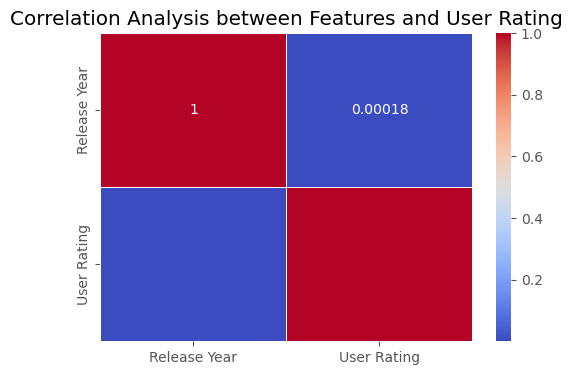

In [18]:
#Perform a Correlation Analysis to identify relationships between game features and user ratings.
correlation_matrix = data[["Release Year", "User Rating"]].corr()

# Display correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Analysis between Features and User Rating")
plt.show()


In [19]:
#Machine Learning and Feature selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, r2_score

# Standardizing Genre and Platform columns
data['Genre'] = data['Genre'].str.strip().str.title()
data['Platform'] = data['Platform'].str.strip().str.title()

# Creating a new 'Decade' column
data['Decade'] = (data['Release Year'] // 10) * 10

# Encoding categorical variables
label_encoders = {}
for col in ["Genre", "Platform"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Defining features and target variable
X = data[["Genre", "Platform", "Release Year", "Decade"]]
y = data["User Rating"]

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=2)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features)

# Re-train Model with Selected Features
X_selected = data[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

optimized_model = RandomForestRegressor(n_estimators=100, random_state=42)
optimized_model.fit(X_train, y_train)

# Predictions
y_pred_optimized = optimized_model.predict(X_test)

# Evaluate Model
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("Optimized Model Performance:")
print("Mean Absolute Error:", mae_optimized)
print("R² Score:", r2_optimized)


Selected Features: Index(['Genre', 'Release Year'], dtype='object')
Optimized Model Performance:
Mean Absolute Error: 2.3124987624459608
R² Score: -0.08900865567623151


**Note: Model performs poorly becasue of following reasons**

1. dataset has Limited Features
2. Random Forest Might Not Be the Best Model – Other models like Gradient Boosting (XGBoost) or Neural Networks may handle complex patterns better.